<a href="https://colab.research.google.com/github/Jeromy0515/big-data-analysis-2/blob/main/%EC%83%81%EA%B0%80%EC%A0%95%EB%B3%B4%EB%B6%84%EC%84%9D/%EC%83%81%EA%B0%80%EC%A0%95%EB%B3%B4%EB%B6%84%EC%84%9D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 명령어 수행 후 런타임 다시 시작 후 모두 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd
!ls

/content
drive  mount  sample_data


In [4]:
# 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# /matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
# font.set_text(s, 0.0, flags=flags) 
# 좌표축에 -기호를 인식하지 못해 깨지는 현상 발생 
# 해결방법
plt.rc('axes', unicode_minus=False)

In [6]:
# 폰트설정
plt.rc('font', family='NanumBarunGothic')

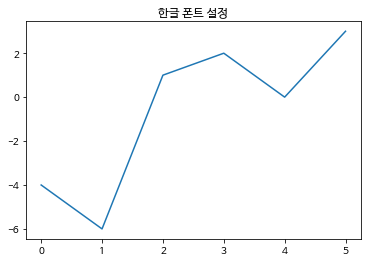

In [7]:
# 폰트 적용 테스트
plt.title('한글 폰트 설정')
plt.plot([-4, -6 , 1 , 2, 0, 3])

In [8]:
# 리마운트
from google.colab import drive
drive.mount('./mount', force_remount=True)

Mounted at ./mount


In [9]:
df = pd.read_csv('/content/mount/MyDrive/Data/소상공인시장진흥공단_상가(상권)정보_서울_202112.csv')
df.shape

(315294, 39)

In [10]:
pd.options.display.max_columns = 39

In [11]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600100410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,악기 소매업,11,서울특별시,11200,성동구,1120079000,용답동,1120012200,용답동,1120012200101420011,1,대지,142,11.0,서울특별시 성동구 용답동 142-11,112004109480,서울특별시 성동구 용답5길,2,NaN,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,시계 및 귀금속 소매업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111015200,봉익동,1111015200100430001,1,대지,43,1.0,서울특별시 종로구 봉익동 43-1,111104100163,서울특별시 종로구 서순라길,17,10.0,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1171011100101970003,1,대지,197,3.0,서울특별시 송파구 방이동 197-3,117104169448,서울특별시 송파구 위례성대로12길,31,NaN,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375


In [12]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
315289,17915026,사라헤어하우스,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,11,서울특별시,11620,관악구,1162061500,중앙동,1162010100,봉천동,1162010100108610011,1,대지,861,11.0,서울특별시 관악구 봉천동 861-11,116203120001,서울특별시 관악구 관악로,185,NaN,1162010100108610014026971,NaN,서울특별시 관악구 관악로 185,151811,8758.0,NaN,3,NaN,126.952644,37.481784
315290,17917525,김현진153필라테스,NaN,N,관광/여가/오락,N05,요가/단전/마사지,N05A01,요가/단식,S96129,기타 미용관련 서비스업,11,서울특별시,11740,강동구,1174062000,천호3동,1174010900,천호동,1174010900100510007,1,대지,51,7.0,서울특별시 강동구 천호동 51-7,117402000006,서울특별시 강동구 양재대로,1517,NaN,1174010900100510007009699,남해빌딩,서울특별시 강동구 양재대로 1517,134862,5316.0,NaN,1,NaN,127.140855,37.541259
315291,17913544,26도헤어마곡나루역점,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,11,서울특별시,11500,강서구,1150060300,가양1동,1150010500,마곡동,1150010500107590001,1,대지,759,1.0,서울특별시 강서구 마곡동 759-1,115003155047,서울특별시 강서구 마곡서로,152,NaN,1150010500107590001000001,두산더랜드타워,서울특별시 강서구 마곡서로 152,157805,7788.0,306,NaN,NaN,126.825623,37.567747
315292,17958597,명품케터링,NaN,Q,음식,Q13,음식배달서비스,Q13A03,음식출장조달,I56131,출장 음식 서비스업,11,서울특별시,11305,강북구,1130557500,삼각산동,1130510100,미아동,1130510100113570000,1,대지,1357,NaN,서울특별시 강북구 미아동 1357,113054124223,서울특별시 강북구 삼양로19길,113,NaN,1130510100113570000035071,삼각산아이원아파트,서울특별시 강북구 삼양로19길 113,142718,1198.0,120,NaN,NaN,127.017829,37.617041
315293,17938681,페어즈오브슈즈,NaN,D,소매,D06,가방/신발/액세서리,D06A01,신발소매,G47420,신발 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010900,영등포동8가,1156010900100450005,1,대지,45,5.0,서울특별시 영등포구 영등포동8가 45-5,115603118024,서울특별시 영등포구 영중로,116,NaN,1156010900100450005031978,NaN,서울특별시 영등포구 영중로 116,150030,7229.0,NaN,NaN,NaN,126.905938,37.526557


In [13]:
# 인덱스 정보 출력(행)
df.index

RangeIndex(start=0, stop=315294, step=1)

In [14]:
# 열 정보 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
# 열 타입 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [16]:
# 열별 null값 데이터의 합
n = df.isnull().sum()

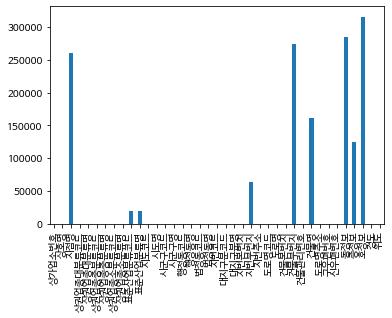

In [17]:
# 막댁 그래프 출력
n.plot.bar()

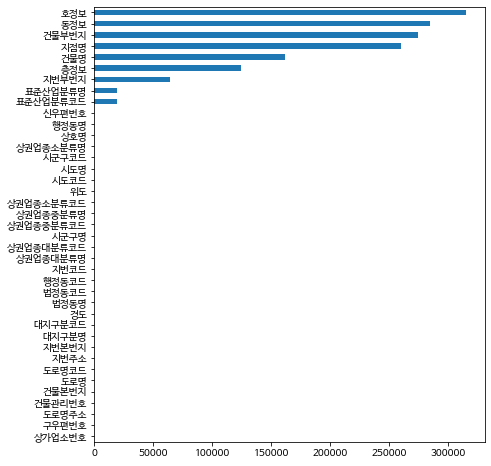

In [18]:
  # 내림차순 정렬후 가로 막대그래프로 출력 figsize로 이미지 크기 지정
  n.sort_values().plot.barh(figsize=(7, 8))

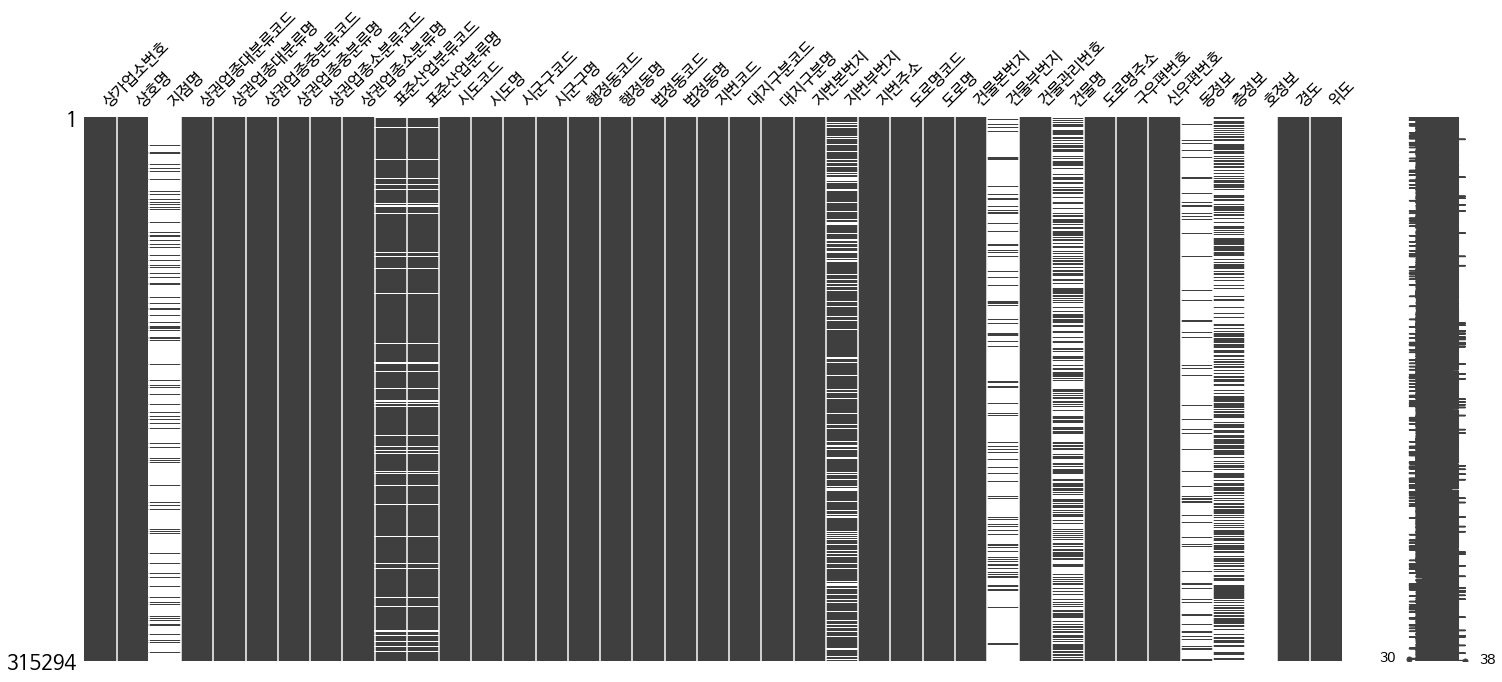

In [19]:
# 데이터 결측치에 대한 매트릭스 출력
# 흰색이 결측치
import missingno as msno

msno.matrix(df)

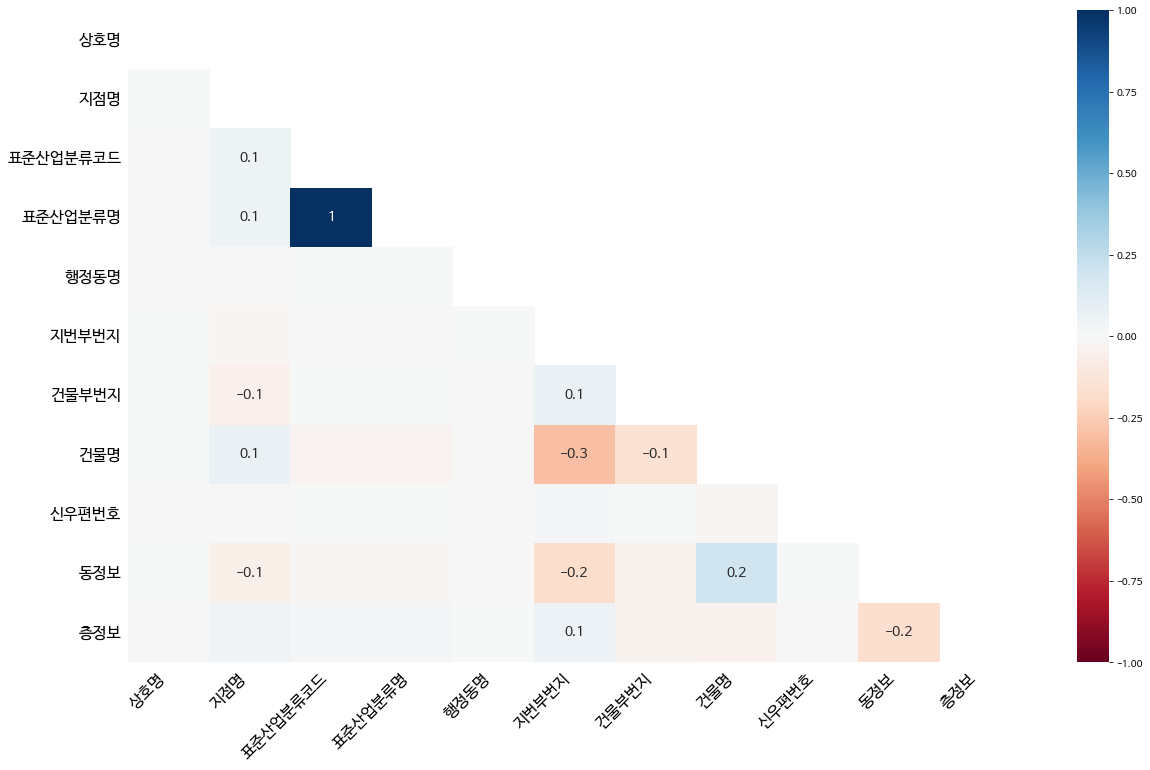

In [20]:
# 데이터 결측치에 대한 히트맵 출력
msno.heatmap(df)

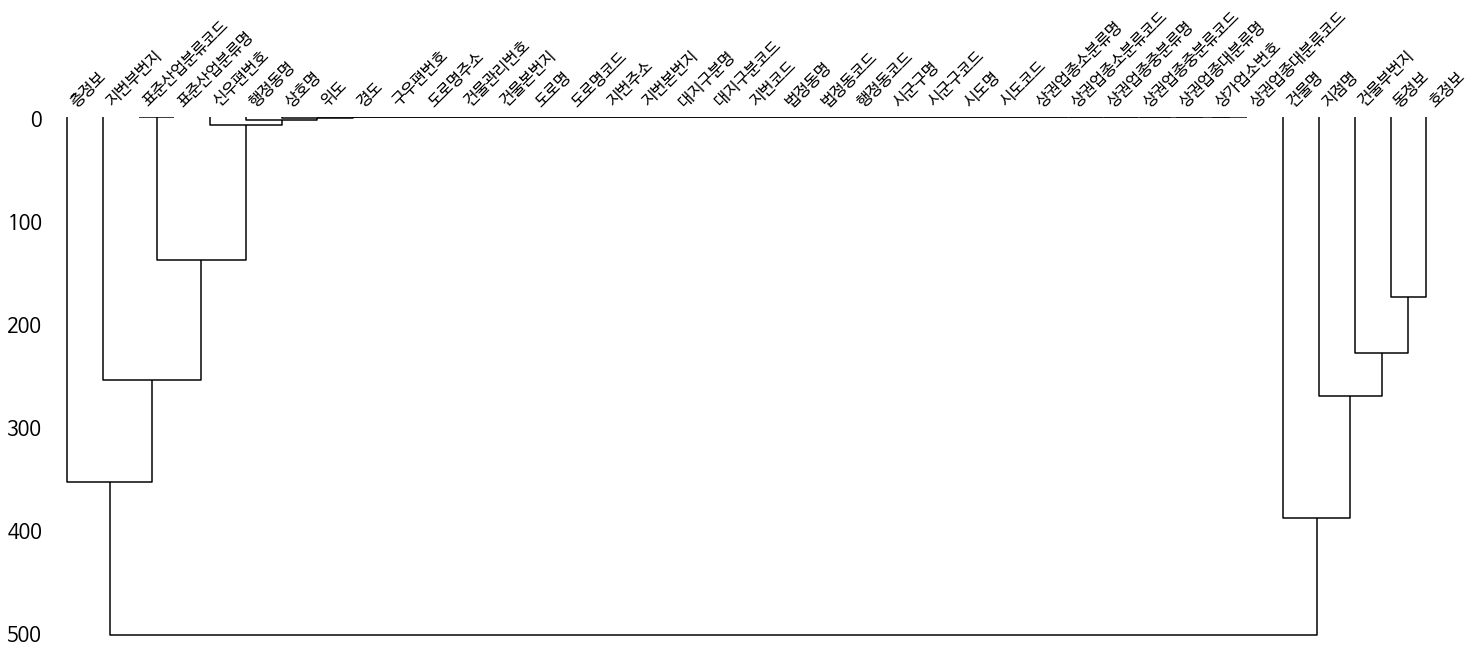

In [21]:
# 데이터 결측치에 대한 덴드로그램 출력
# 덴드로그램은 보통 계측정 군집분석(hierachical clustering) 방식에 대해 시각화하는 그래프로 많이 활용
msno.dendrogram(df)

In [22]:
# 데이터 내림차순 정렬후 결측지가 높은 순으로 9개의 열을 가져옴
not_use = n.sort_values(ascending = False).head(9)
not_use_columns = not_use.index
not_use_columns

Index(['호정보', '동정보', '건물부번지', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [23]:
# 열 삭제, axis 가 0이면 행 1이면 열
print(df.shape)
df = df.drop(not_use_columns, axis = 1)
print(df.shape)

(315294, 39)
(315294, 30)


In [24]:
# 데이터 프레임 정보 출력
# 열을 줄이니 메모리가 줄어든 것을 볼 수 있음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315294 entries, 0 to 315293
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     315294 non-null  int64  
 1   상호명        315293 non-null  object 
 2   상권업종대분류코드  315294 non-null  object 
 3   상권업종대분류명   315294 non-null  object 
 4   상권업종중분류코드  315294 non-null  object 
 5   상권업종중분류명   315294 non-null  object 
 6   상권업종소분류코드  315294 non-null  object 
 7   상권업종소분류명   315294 non-null  object 
 8   시도코드       315294 non-null  int64  
 9   시도명        315294 non-null  object 
 10  시군구코드      315294 non-null  int64  
 11  시군구명       315294 non-null  object 
 12  행정동코드      315294 non-null  int64  
 13  행정동명       315289 non-null  object 
 14  법정동코드      315294 non-null  int64  
 15  법정동명       315294 non-null  object 
 16  지번코드       315294 non-null  int64  
 17  대지구분코드     315294 non-null  int64  
 18  대지구분명      315294 non-null  object 
 19  지번본번지      315294 non-n

In [25]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [26]:
# 이름에 코드 혹은 번호가 포함된 열을 가져옴
# contains(regex)
col_code = cols[cols.str.contains('코드|번호')]
col_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [27]:
# 이름에 코드 혹은 번호가 포함된 열 삭제
print(df.shape)
df = df.drop(col_code, axis=1)
print(df.shape)

(315294, 30)
(315294, 16)


In [28]:
# 데이터 프레임 정보 출력
# 역시 메모리가 줄어듬
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315294 entries, 0 to 315293
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       315293 non-null  object 
 1   상권업종대분류명  315294 non-null  object 
 2   상권업종중분류명  315294 non-null  object 
 3   상권업종소분류명  315294 non-null  object 
 4   시도명       315294 non-null  object 
 5   시군구명      315294 non-null  object 
 6   행정동명      315289 non-null  object 
 7   법정동명      315294 non-null  object 
 8   대지구분명     315294 non-null  object 
 9   지번본번지     315294 non-null  int64  
 10  지번주소      315294 non-null  object 
 11  도로명       315294 non-null  object 
 12  건물본번지     315294 non-null  int64  
 13  도로명주소     315294 non-null  object 
 14  경도        315294 non-null  float64
 15  위도        315294 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 38.5+ MB


In [29]:
# 데이터 프레임 형태로 출력하기 위해서 대괄호 두개로 감싸줌 [[]]
df[['상호명']].head()

,상호명
0,제중건강원
1,민속악기사
2,태평양진주
3,김선희꼼꼼국어교습소
4,비지트


In [30]:
# 두 종류(열) 이상의 데이터를 불러올 때는 무조건 데이터 프레임 형태로 가져와야됨
df[['상호명', '도로명주소']]

,상호명,도로명주소
0,제중건강원,서울특별시 영등포구 영중로14길 11-17
1,민속악기사,서울특별시 성동구 용답5길 2
2,태평양진주,서울특별시 종로구 서순라길 17-10
3,김선희꼼꼼국어교습소,서울특별시 송파구 위례성대로12길 31
4,비지트,서울특별시 서초구 동광로18길 82
...,...,...
315289,사라헤어하우스,서울특별시 관악구 관악로 185
315290,김현진153필라테스,서울특별시 강동구 양재대로 1517
315291,26도헤어마곡나루역점,서울특별시 강서구 마곡서로 152
315292,명품케터링,서울특별시 강북구 삼양로19길 113


In [31]:
# loc를 이용해 행 또는 열의 데이터를 조회
# loc는 ()가 아닌 []를 사용함
df.loc[[0, 1, 2]]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,대지,41,서울특별시 영등포구 영등포동5가 41-1,서울특별시 영등포구 영중로14길,11,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,대지,142,서울특별시 성동구 용답동 142-11,서울특별시 성동구 용답5길,2,서울특별시 성동구 용답5길 2,127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,대지,43,서울특별시 종로구 봉익동 43-1,서울특별시 종로구 서순라길,17,서울특별시 종로구 서순라길 17-10,126.993530,37.571848


In [32]:
# 2차원 배열 형태로 행에 대하여 특정 열의 정보를 가져올 수 있음
print(df.loc[[0, 1, 2]][['상호명']]) # 위에 꺼보다
print(df.loc[[0, 1, 2], ['상호명']]) # 아래가 더 빠름

     상호명
0  제중건강원
1  민속악기사
2  태평양진주
     상호명
0  제중건강원
1  민속악기사
2  태평양진주


In [33]:
# 상호명, 도로명 앞에 3번째 값 출력
df.loc[[0, 1, 2], ['상호명', '도로명']]

,상호명,도로명
0,제중건강원,서울특별시 영등포구 영중로14길
1,민속악기사,서울특별시 성동구 용답5길
2,태평양진주,서울특별시 종로구 서순라길


In [34]:
# iloc : Integer location, 행 또는 열을 정수값 인덱스로 접근
# loc는 라벨이나 조건표현으로 가져옴
df.iloc[:].shape

(315294, 16)

In [35]:
# 앞에서부터 행 5개 열 5개 출력
df.iloc[:5, :5]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명
0,제중건강원,소매,건강/미용식품,건강원,서울특별시
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시
4,비지트,음식,한식,한식/백반/한정식,서울특별시


In [36]:
# 뒤에서부터 행 5개 열 5개 출력
df.iloc[-5:, -5:]

,도로명,건물본번지,도로명주소,경도,위도
315289,서울특별시 관악구 관악로,185,서울특별시 관악구 관악로 185,126.952644,37.481784
315290,서울특별시 강동구 양재대로,1517,서울특별시 강동구 양재대로 1517,127.140855,37.541259
315291,서울특별시 강서구 마곡서로,152,서울특별시 강서구 마곡서로 152,126.825623,37.567747
315292,서울특별시 강북구 삼양로19길,113,서울특별시 강북구 삼양로19길 113,127.017829,37.617041
315293,서울특별시 영등포구 영중로,116,서울특별시 영등포구 영중로 116,126.905938,37.526557


In [37]:
# describe() : 각종 통계량을 요약해서 출력
df.describe(include='object')

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,315293,315294,315294,315294,315294,315294,315289,315294,315294,315294,315294,315294
unique,227916,8,89,671,1,25,426,464,2,125065,12123,124398
top,CU,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,서울특별시 종로구 종로 266
freq,1612,111654,37156,26716,315294,29867,5445,6705,314994,883,2130,896


In [38]:
# 상권업종대분류명의 각 고유한 값(unique) 출력
df['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

In [39]:
# nunique() : 상권업종대분류명의 고유한 값의 크기 출력
df['상권업종대분류명'].nunique()

8

In [40]:
# 요소의 최빈값의 형태를 출력
df['상권업종대분류명'].mode()

0    음식
dtype: object

In [41]:
# include=None 이 기본값
df.describe()

,지번본번지,건물본번지,경도,위도
count,315294.000000,315294.000000,315294.000000,315294.000000
mean,416.377242,140.687076,126.994451,37.545334
std,422.422749,260.018839,0.083680,0.049078
min,0.000000,1.000000,126.768169,37.434081
25%,100.000000,19.000000,126.923287,37.504884
50%,295.000000,47.000000,127.009408,37.542790
75%,636.000000,157.000000,127.056499,37.572987
max,9999.000000,3318.000000,127.182588,37.690787


In [42]:
# 위도, 경도의 통계량 출력
df[['위도', '경도']].describe()

,위도,경도
count,315294.000000,315294.000000
mean,37.545334,126.994451
std,0.049078,0.083680
min,37.434081,126.768169
25%,37.504884,126.923287
50%,37.542790,127.009408
75%,37.572987,127.056499
max,37.690787,127.182588


In [43]:
# 위도의 개수 출력
df[['위도']].count()

위도    315294
dtype: int64

In [44]:
# 위도의 평균값 출력
df[['위도']].mean()

위도    37.545334
dtype: float64

In [45]:
# 위도의 표준편차 출력
df[['위도']].std()

위도    0.049078
dtype: float64

In [46]:
# 위도의 최소값 출력
df[['위도']].min()

위도    37.434081
dtype: float64

In [47]:
# 위도의 최대값 출력
df[['위도']].max()

위도    37.690787
dtype: float64

In [48]:
# quantile(q=0.5) : 백분위수를 가져옴
# 25%에 해당하는 값 출력
df[['위도']].quantile(q=0.25)

위도    37.504884
Name: 0.25, dtype: float64

In [49]:
# 50%에 해당하는 값 가져옴
# q=0.5 가 기본값
df[['위도']].quantile()

위도    37.54279
Name: 0.5, dtype: float64

In [50]:
# 중앙값 출력 
# df[['위도']].quantile() 과 동일 
# 50% = 중앙값
df[['위도']].median()

위도    37.54279
dtype: float64

In [51]:
# 분산값 출력
df[['위도']].var()

위도    0.002409
dtype: float64

In [52]:
# sqrt(): 제곱근 반환
# 표준편차^2 = 분산값
np.sqrt(df[['위도']].var())

위도    0.049078
dtype: float64

In [53]:
# 상권업종대분류명이 음식인 값만 출력
df[df['상권업종대분류명'] == '음식']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,서울특별시 서초구 동광로18길 82,126.991394,37.488375
5,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,대지,139,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길,12,서울특별시 동작구 동작대로27가길 12,126.980952,37.487105
6,채움,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,대지,58,서울특별시 종로구 수송동 58,서울특별시 종로구 삼봉로,81,서울특별시 종로구 삼봉로 81,126.981794,37.572387
7,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,서울특별시 서초구 효령로 230,127.009382,37.483436
8,고향생막걸리,음식,유흥주점,민속주점,서울특별시,강남구,압구정동,신사동,대지,615,서울특별시 강남구 신사동 615-1,서울특별시 강남구 압구정로,216,서울특별시 강남구 압구정로 216,127.031012,37.528073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315261,궁정만두,음식,분식,국수/만두/칼국수,서울특별시,강남구,역삼1동,역삼동,대지,741,서울특별시 강남구 역삼동 741,서울특별시 강남구 테헤란로14길,25,서울특별시 강남구 테헤란로14길 25,127.033757,37.497712
315277,컴포즈커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,은평구,응암1동,응암동,대지,738,서울특별시 은평구 응암동 738,서울특별시 은평구 은평로,82,서울특별시 은평구 은평로 82,126.916949,37.599075
315278,돼지코생곱창갈비잠실새내점,음식,한식,곱창/양구이전문,서울특별시,송파구,잠실본동,잠실동,대지,189,서울특별시 송파구 잠실동 189-10,서울특별시 송파구 백제고분로7길,32,서울특별시 송파구 백제고분로7길 32-8,127.082435,37.510409
315281,커스텀샐러드,음식,한식,한식/백반/한정식,서울특별시,관악구,신림동,신림동,대지,1421,서울특별시 관악구 신림동 1421-43,서울특별시 관악구 남부순환로181길,15,서울특별시 관악구 남부순환로181길 15,126.930807,37.485202


In [54]:
# 상권업종대분류명이 음식인 데이터만 복사
df_food = df[df['상권업종대분류명'] == '음식'].copy()

In [55]:
# 시군구명이 강남구인 데이터만 출력
df[df['시군구명'] == '강남구']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
8,고향생막걸리,음식,유흥주점,민속주점,서울특별시,강남구,압구정동,신사동,대지,615,서울특별시 강남구 신사동 615-1,서울특별시 강남구 압구정로,216,서울특별시 강남구 압구정로 216,127.031012,37.528073
19,호랑이가만든족발,음식,한식,족발/보쌈전문,서울특별시,강남구,역삼1동,역삼동,대지,704,서울특별시 강남구 역삼동 704-4,서울특별시 강남구 테헤란로43길,28,서울특별시 강남구 테헤란로43길 28,127.044182,37.504996
25,대동석유압구정주유소,생활서비스,주유소/충전소,주유소,서울특별시,강남구,압구정동,신사동,대지,633,서울특별시 강남구 신사동 633,서울특별시 강남구 언주로,842,서울특별시 강남구 언주로 842,127.033876,37.525321
33,캐논비즈니스프라자전시장,소매,사무/문구/컴퓨터,사무용기기소매,서울특별시,강남구,삼성1동,삼성동,대지,168,서울특별시 강남구 삼성동 168-12,서울특별시 강남구 테헤란로,607,서울특별시 강남구 테헤란로 607,127.063987,37.509507
36,소낙스,생활서비스,자동차/이륜차,세차장,서울특별시,강남구,역삼1동,역삼동,대지,694,서울특별시 강남구 역삼동 694-25,서울특별시 강남구 선릉로,537,서울특별시 강남구 선릉로 537,127.046474,37.507105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315222,컴퓨터수리,생활서비스,개인/가정용품수리,컴퓨터수리,서울특별시,강남구,논현2동,논현동,대지,65,서울특별시 강남구 논현동 65-24,서울특별시 강남구 언주로147길,42,서울특별시 강남구 언주로147길 42,127.030946,37.519197
315231,"소리와공간스튜디오,기획",관광/여가/오락,연극/영화/극장,연극/음악/예술관련기타,서울특별시,강남구,도곡2동,도곡동,대지,457,서울특별시 강남구 도곡동 457-5,서울특별시 강남구 논현로26길,46,서울특별시 강남구 논현로26길 46-10,127.046187,37.483414
315261,궁정만두,음식,분식,국수/만두/칼국수,서울특별시,강남구,역삼1동,역삼동,대지,741,서울특별시 강남구 역삼동 741,서울특별시 강남구 테헤란로14길,25,서울특별시 강남구 테헤란로14길 25,127.033757,37.497712
315275,플로밴코,소매,선물/팬시/기념품,꽃집/꽃배달,서울특별시,강남구,신사동,압구정동,대지,426,서울특별시 강남구 압구정동 426,서울특별시 강남구 압구정로,151,서울특별시 강남구 압구정로 151,127.023051,37.528710


In [56]:
# 시군구명이 강남구이면서 상권업종대분류명이 음식인 데이터 출력
# 판다스에서 AND는 and가 아니라 & 로 표시함
# 우선순위를 지정해줘야하기 때문에 소괄호로 감싸줘야됨
df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
8,고향생막걸리,음식,유흥주점,민속주점,서울특별시,강남구,압구정동,신사동,대지,615,서울특별시 강남구 신사동 615-1,서울특별시 강남구 압구정로,216,서울특별시 강남구 압구정로 216,127.031012,37.528073
19,호랑이가만든족발,음식,한식,족발/보쌈전문,서울특별시,강남구,역삼1동,역삼동,대지,704,서울특별시 강남구 역삼동 704-4,서울특별시 강남구 테헤란로43길,28,서울특별시 강남구 테헤란로43길 28,127.044182,37.504996
155,의정부부대찌개,음식,한식,부대찌개/섞어찌개,서울특별시,강남구,대치2동,대치동,대지,955,서울특별시 강남구 대치동 955-6,서울특별시 강남구 역삼로83길,24,서울특별시 강남구 역삼로83길 24,127.059382,37.505082
195,바른치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,강남구,대치4동,대치동,대지,889,서울특별시 강남구 대치동 889-72,서울특별시 강남구 선릉로86길,17,서울특별시 강남구 선릉로86길 17,127.051054,37.503556
233,알뤼르,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치4동,대치동,대지,894,서울특별시 강남구 대치동 894,서울특별시 강남구 삼성로85길,33,서울특별시 강남구 삼성로85길 33,127.054731,37.504378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315021,커스텀커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치1동,대치동,대지,623,서울특별시 강남구 대치동 623,서울특별시 강남구 남부순환로,2921,서울특별시 강남구 남부순환로 2921,127.059754,37.493489
315066,매머드익스프레스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,논현1동,논현동,대지,120,서울특별시 강남구 논현동 120-3,서울특별시 강남구 학동로2길,6,서울특별시 강남구 학동로2길 6,127.022208,37.510926
315107,100키친,음식,한식,한식/백반/한정식,서울특별시,강남구,역삼1동,역삼동,대지,619,서울특별시 강남구 역삼동 619-29,서울특별시 강남구 봉은사로18길,88,서울특별시 강남구 봉은사로18길 88,127.027619,37.500996
315138,BBQ치킨,음식,닭/오리요리,후라이드/양념치킨,서울특별시,강남구,일원2동,개포동,대지,12,서울특별시 강남구 개포동 12-4,서울특별시 강남구 개포로,615,서울특별시 강남구 개포로 615,127.075573,37.492649


In [57]:
# 상권업종중분류명으로 구분한 상권 개수를 출력
# value_counts() : 개별적인 값의 개수 출력
# SQL에서 group by 같은 역할
df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')][['상권업종중분류명']].value_counts()

상권업종중분류명
한식          3446
커피점/카페      2034
양식          1136
일식/수산물       927
유흥주점         823
분식           740
패스트푸드        479
제과제빵떡케익      429
닭/오리요리       328
중식           289
별식/퓨전요리      188
기타음식업         46
부페            45
음식배달서비스       10
dtype: int64

In [58]:
# 행렬을 합쳐서 데이터를 불러올 경우 loc로 불러와야함
df.loc[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식'), ['상권업종중분류명']].value_counts()

상권업종중분류명
한식          3446
커피점/카페      2034
양식          1136
일식/수산물       927
유흥주점         823
분식           740
패스트푸드        479
제과제빵떡케익      429
닭/오리요리       328
중식           289
별식/퓨전요리      188
기타음식업         46
부페            45
음식배달서비스       10
dtype: int64

In [59]:
# 시도명이 서울특별시 이면서 상권업종대분류명이 음식인 데이터 출력
df_seoul_food = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '음식')]
df_seoul_food.head(5)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,서울특별시 서초구 동광로18길 82,126.991394,37.488375
5,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,대지,139,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길,12,서울특별시 동작구 동작대로27가길 12,126.980952,37.487105
6,채움,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,대지,58,서울특별시 종로구 수송동 58,서울특별시 종로구 삼봉로,81,서울특별시 종로구 삼봉로 81,126.981794,37.572387
7,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,서울특별시 서초구 효령로 230,127.009382,37.483436
8,고향생막걸리,음식,유흥주점,민속주점,서울특별시,강남구,압구정동,신사동,대지,615,서울특별시 강남구 신사동 615-1,서울특별시 강남구 압구정로,216,서울특별시 강남구 압구정로 216,127.031012,37.528073


In [60]:
# 시군구명과 상권업종중분류명으로 그룹핑한 카운트 값 
# 상호명으로 한 이유는 모든 열이 다 동일한 값을 가지고 있기 때문에 그냥 상호명으로 한거임 다른 열로 해도 값은 똑같이 나옴
food_gu = df_seoul_food.groupby(['시군구명', '상권업종중분류명'])['상호명'].count()

In [61]:
  # pivot_table() : 데이터를 피벗 테이블로 보여줌
  df_seoul_food.pivot_table(index=['시군구명', '상권업종중분류명'], values=['상호명'], aggfunc='count')

상호명
시군구명 상권업종중분류명      
강남구  기타음식업       46
     닭/오리요리     328
     별식/퓨전요리    188
     부페          45
     분식         740
...             ...
중랑구  제과제빵떡케익    142
     중식          70
     커피점/카페     459
     패스트푸드      162
     한식        1181

[349 rows x 1 columns]

In [62]:
# unstack() : 데이터프레임을 왼쪽에서 오른쪽으로(열방향) 재구조화
food_gu.unstack()

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,46.0,328.0,188.0,45.0,740.0,1136.0,823.0,10.0,927.0,429.0,289.0,2034.0,479.0,3446.0
강동구,6.0,256.0,99.0,24.0,404.0,131.0,473.0,3.0,350.0,213.0,103.0,690.0,235.0,1406.0
강북구,4.0,210.0,67.0,6.0,305.0,79.0,379.0,3.0,188.0,111.0,55.0,316.0,143.0,1260.0
강서구,28.0,306.0,118.0,18.0,478.0,314.0,564.0,1.0,425.0,241.0,169.0,1013.0,277.0,1829.0
관악구,13.0,245.0,95.0,12.0,401.0,240.0,534.0,3.0,299.0,144.0,106.0,601.0,199.0,1269.0
광진구,14.0,219.0,83.0,12.0,401.0,188.0,430.0,1.0,308.0,168.0,146.0,728.0,210.0,1261.0
구로구,14.0,267.0,98.0,18.0,368.0,94.0,557.0,3.0,227.0,138.0,220.0,548.0,195.0,1282.0
금천구,12.0,162.0,74.0,14.0,255.0,80.0,315.0,2.0,164.0,100.0,114.0,417.0,117.0,952.0
노원구,14.0,292.0,84.0,9.0,382.0,123.0,352.0,7.0,234.0,197.0,112.0,545.0,251.0,1093.0


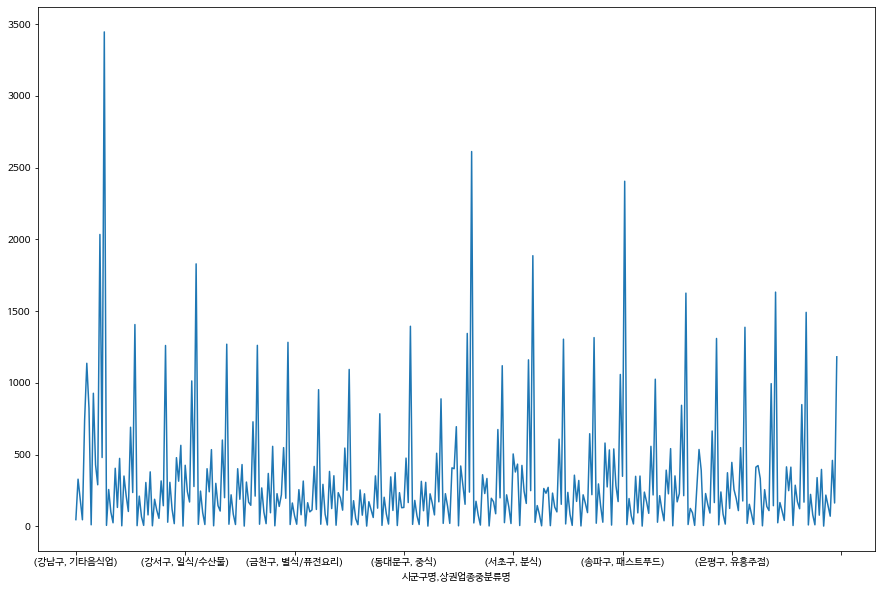

In [63]:
# 그래프 출력
plt.figure(figsize=(15,10))
food_gu.plot()

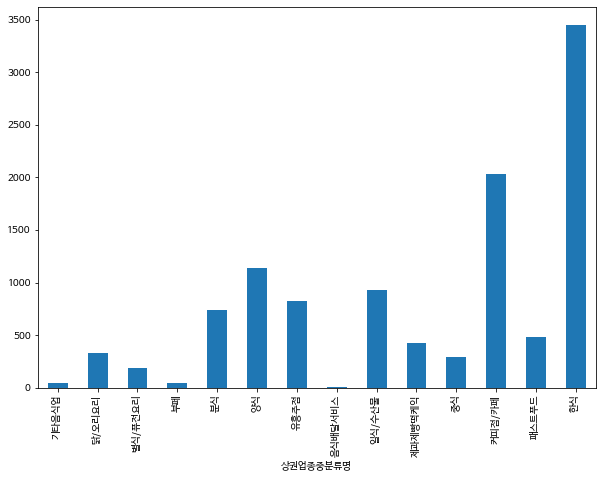

In [64]:
# 시군구명이 강남구인 데이터만 막대그래프로 출력
food_gu.unstack().loc['강남구'].plot.bar(figsize=(10,7))

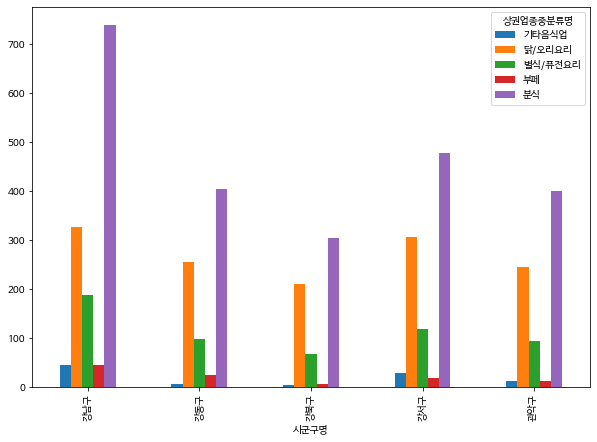

In [65]:
# 앞에서부터 행, 열 5개까지의 데이터만 출력
food_gu.unstack().iloc[:5, :5].plot.bar(figsize=(10,7))

In [66]:
# reset_index() : 데이터 프레임의 인덱스를 처음부터 재배열 해줌
# rename(columns) : 특정 열을 지정하여 열명을 변경
food = food_gu.reset_index()

food = food.rename(columns = {'상호명':'상호수'})

In [67]:
food

,시군구명,상권업종중분류명,상호수
0,강남구,기타음식업,46
1,강남구,닭/오리요리,328
2,강남구,별식/퓨전요리,188
3,강남구,부페,45
4,강남구,분식,740
...,...,...,...
344,중랑구,제과제빵떡케익,142
345,중랑구,중식,70
346,중랑구,커피점/카페,459
347,중랑구,패스트푸드,162


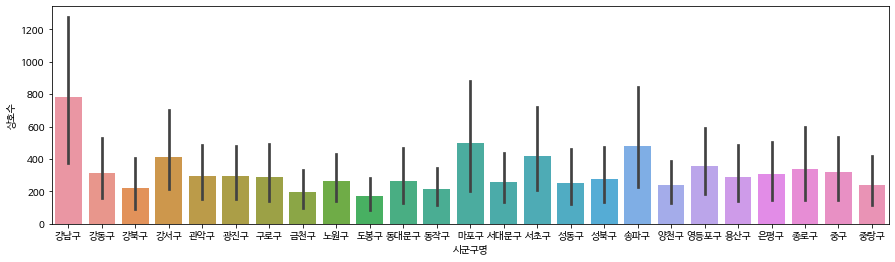

In [68]:
# 시군구명과 상호수로만 구분되어있음 상권업종중분류명은 구분되어있지않음
# 그래프로 표현된 상호수는 모든 상권업종중분류명의 상호수값의 평균값임
# 검은색 작대기는 신뢰구간
plt.figure(figsize = (15, 4))
sns.barplot(data = food, x = '시군구명', y = '상호수')

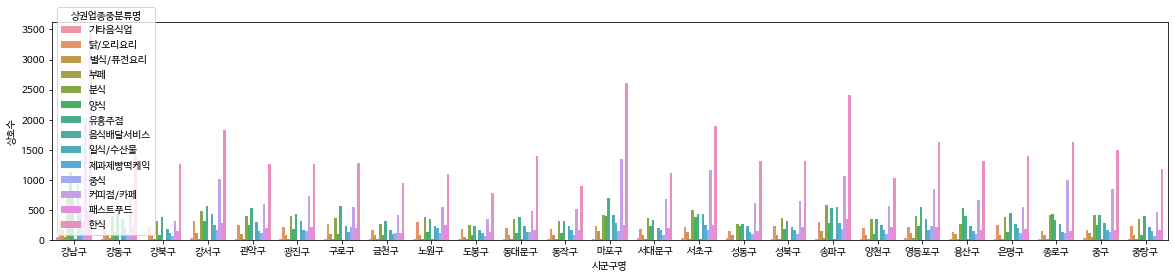

In [69]:
# 시군구별 상호수를 상권업종중분류명으로 분류
plt.figure(figsize = (20, 4))
sns.barplot(data = food, x = '시군구명', y = '상호수', hue = '상권업종중분류명')

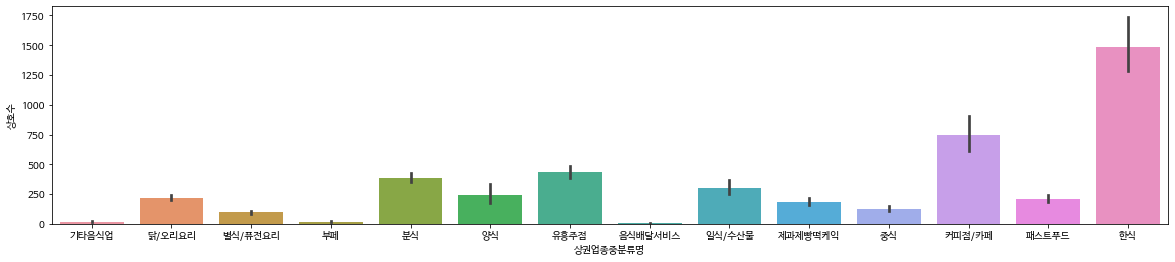

In [70]:
# 서울시 상권업종중분류명별 상점(상가) 갯수 그래프로 표현
plt.figure(figsize = (20, 4))
sns.barplot(data = food, x = '상권업종중분류명', y = '상호수')

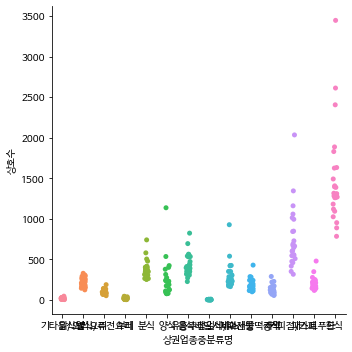

In [71]:
# catplot() : 산점도 그래프 출력
# catplot은 figsize가 안먹음
sns.catplot(data = food, x = '상권업종중분류명', y = '상호수')

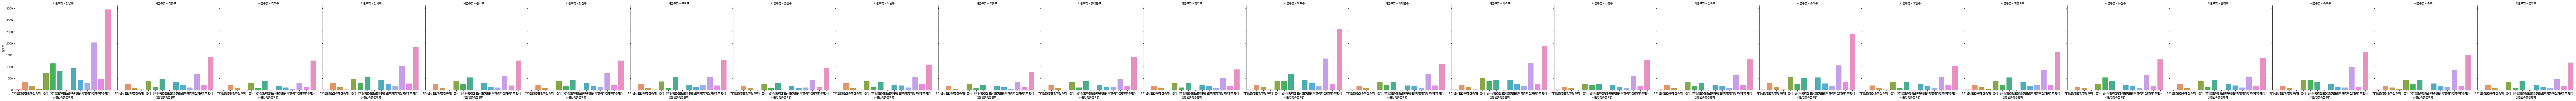

In [72]:
# catplot을 이용해 Categorical plots를 모두 그릴 수 있음
# kind 파라미터로 설정 가능 --> strip(기본값), swarm, box, violin, boxen, point, bar, count
# col 파라미터를 통해 데이터를 시군구명으로 분류함
sns.catplot(data = food, x = '상권업종중분류명', y = '상호수', kind = 'bar', col = '시군구명')

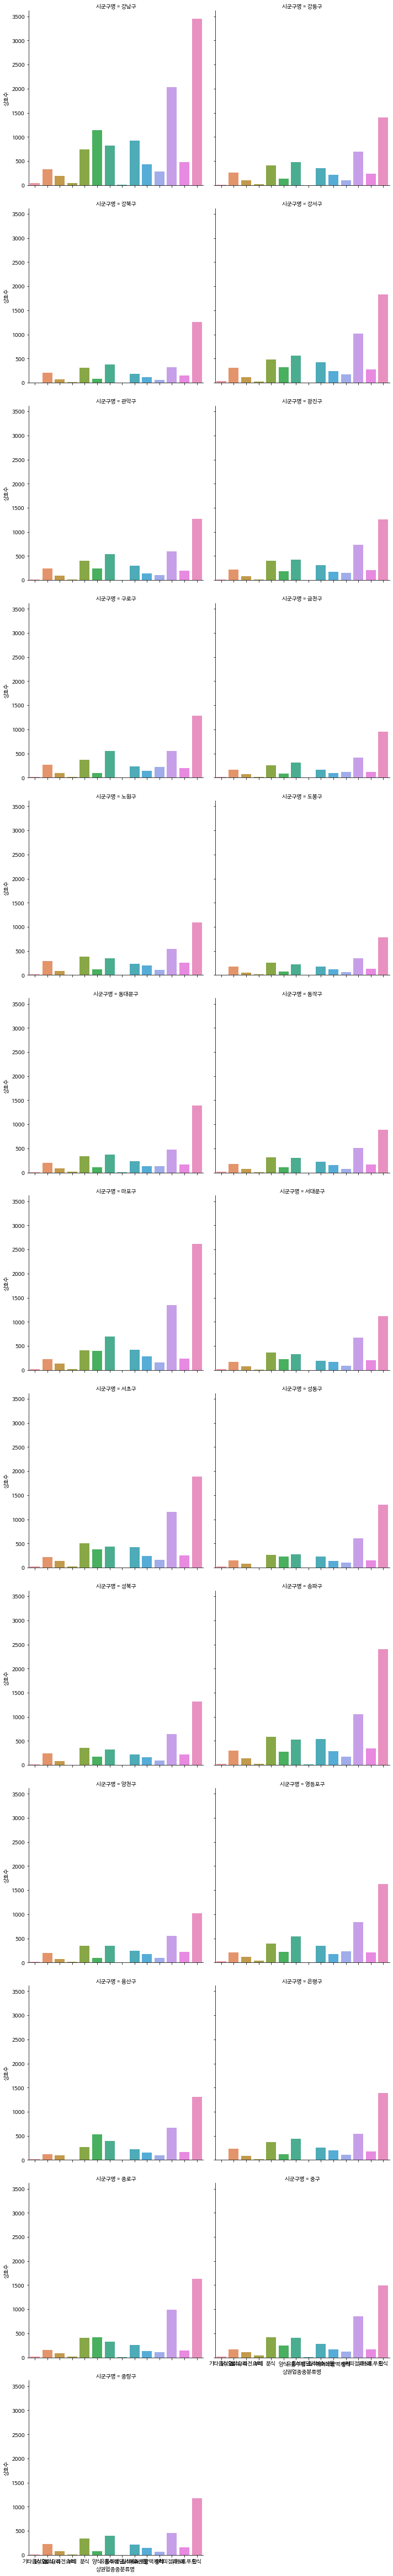

In [73]:
# col_wrap 파라미터로 열 크기를 지정할 수 있음 기본값은 None
sns.catplot(data = food, x = '상권업종중분류명', y = '상호수', kind = 'bar', col = '시군구명', col_wrap = 2)

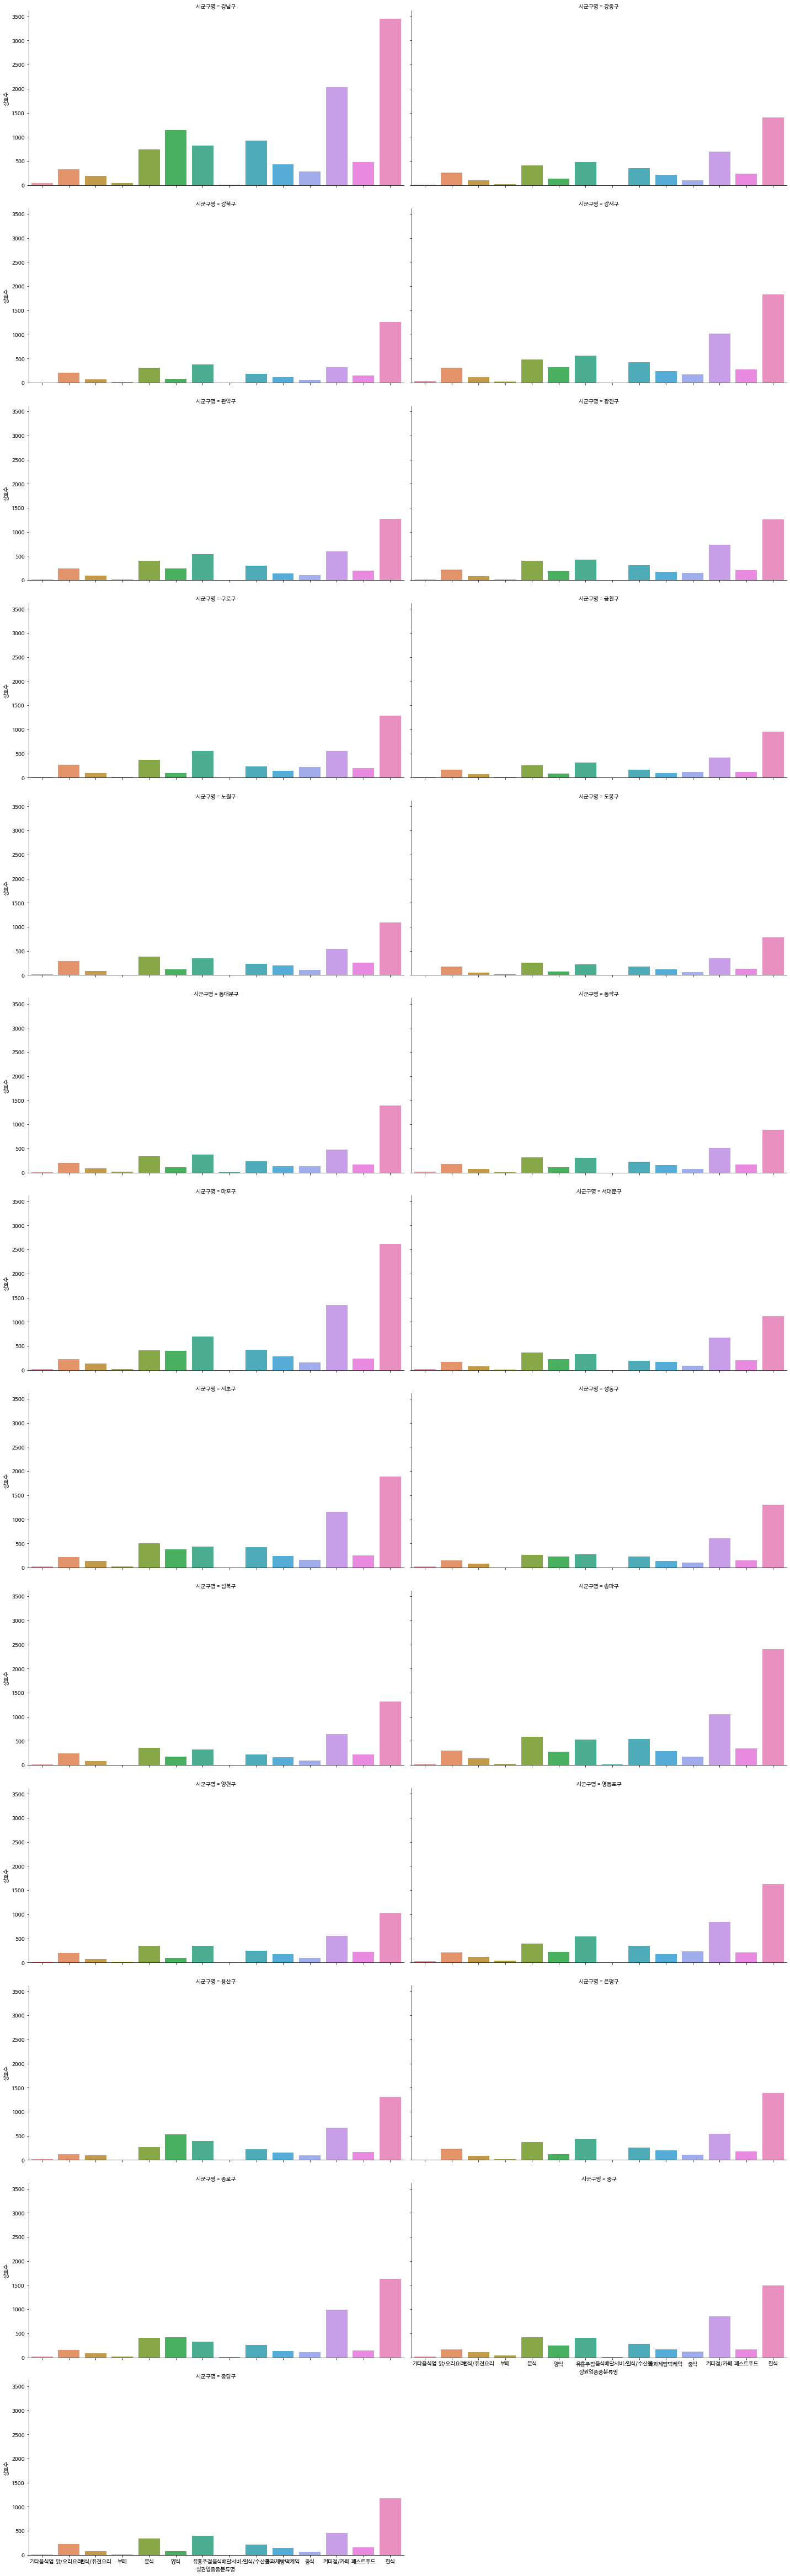

In [77]:
# aspect 파라미터로 가로 세로 비율 지정 가능 기본값은 1
sns.catplot(data = food, x = '상권업종중분류명', y = '상호수', kind = 'bar', col = '시군구명', col_wrap = 2, aspect = 2)

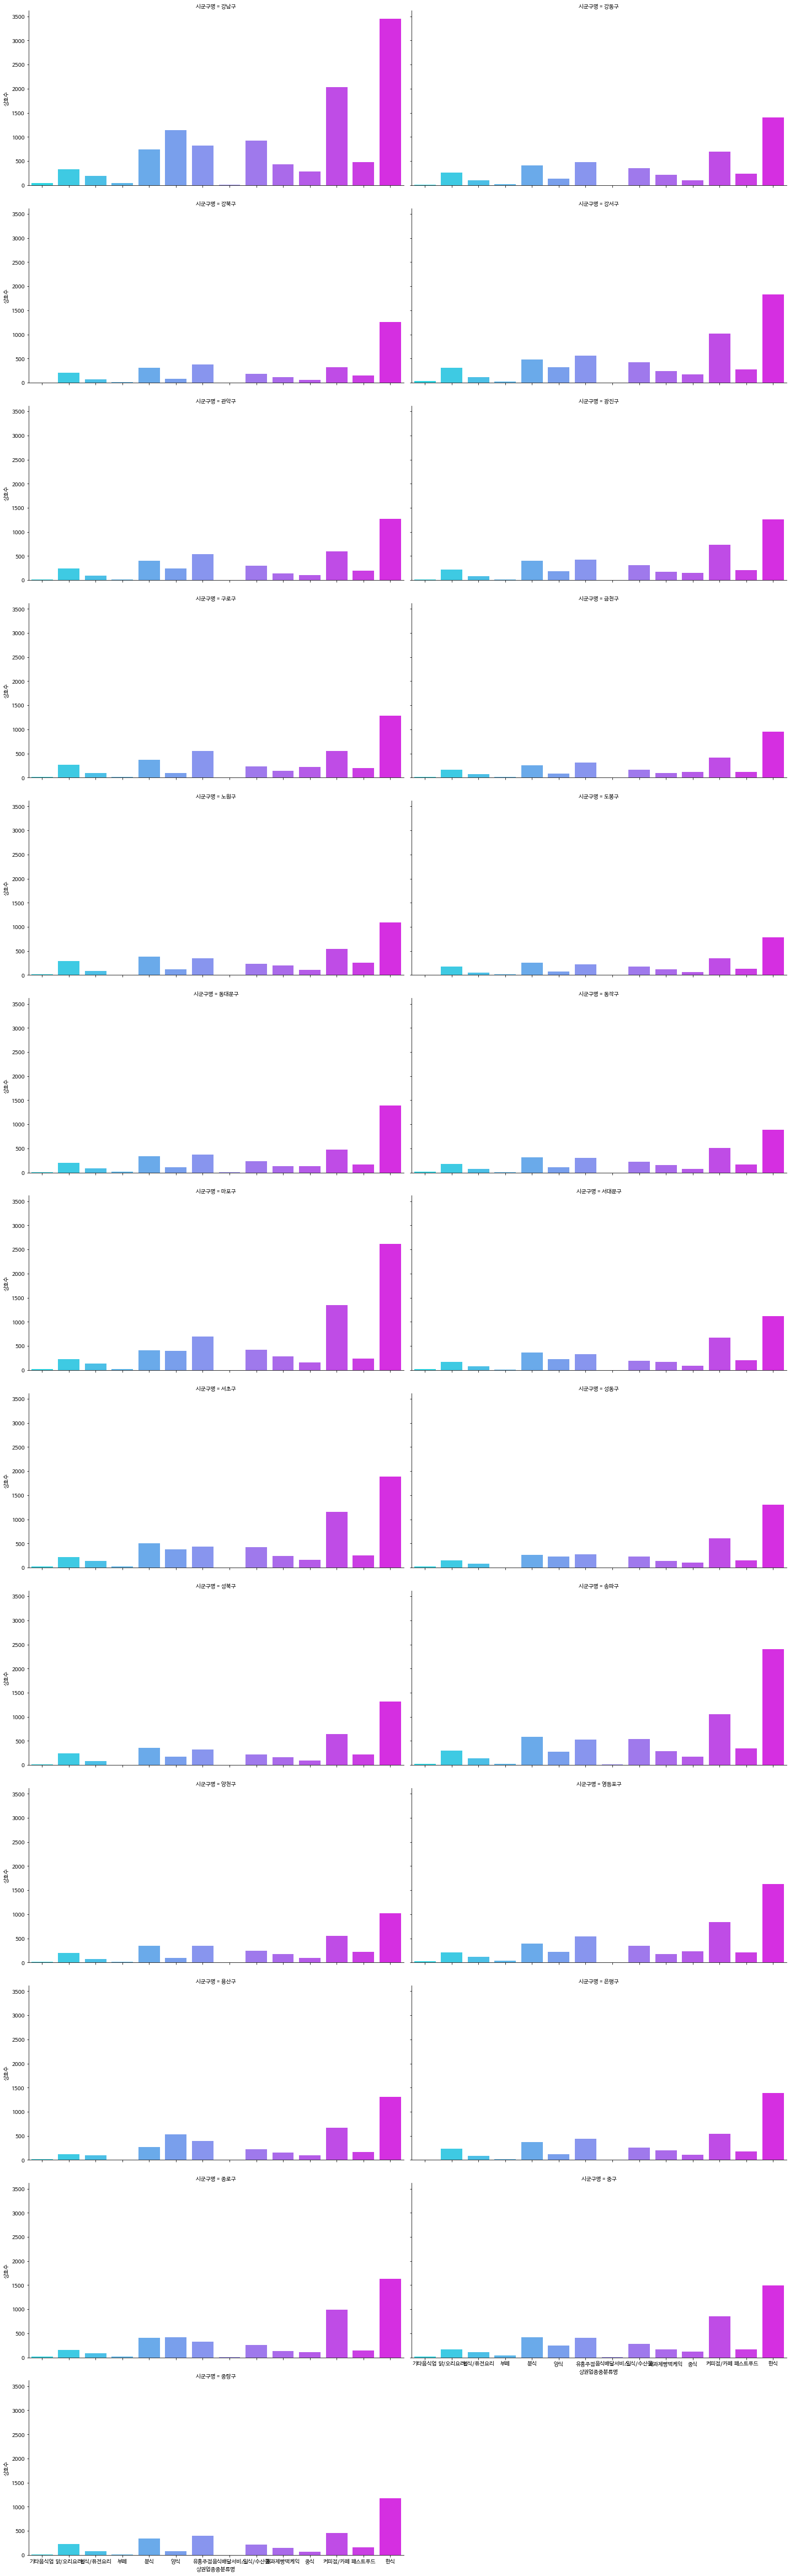

In [75]:
# palette 파라미터로 다양한 색상 지정 가능
sns.catplot(data = food, x = '상권업종중분류명', y = '상호수', kind = 'bar', col = '시군구명', col_wrap = 2, aspect = 2, palette='cool')